# Inaugural Project - Stressfaktoren

In [25]:
import numpy as np
import math

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

We onsider the following model of housing demand and taxation, maximing the consumers utility from house quality and consumption: $$c^*, h^* = arg\ max\ c^{1-\phi}h^\phi$$
s.t.
$$\tilde{p}_{h}=p_{h}\epsilon$$
$$m=\tau(p_h,\tilde{p}_{h})+c$$
$$\tau(p_h,\tilde{p}_{h})=r p_h+\tau^{g}\tilde{p}_{h}+\tau^{P} \max (\tilde{p}_{h}-\bar{p},0)$$
c is consumption, h is housing quality, m is the amount of cash the household has, r is the interest rate, $\bar[p]$ is the tax bracket cutoff, $\tau^{g}$ is the standard house tax, $\tau^{p}$ is the progressive house tax, epsilon is an undervut factor.

With a bit of manipulation the following expression can be derived, where from the optimal h is found maximising utility:
$$U=[m-(r*h+\tau^{g}*h*\epsilon+\tau^{P}*max \ (h*\epsilon-\bar{p}))]^{1-\phi}*h^{\phi}$$
The parameter values are as following: $$\phi=0.3, \ \epsilon=0.5, \ r=0.03, \tau^{g}=0.012, \ \tau^{p}=0.004 \ , \bar{p}=3$$



In [26]:
# code for solving the model (remember documentation and comments)

#Define the parameter values.
m=0.5
phi=0.3
epsilon=0.5
r=0.03
taug=0.012
taup=0.004
pbar=3.0

#Compute the optimal consumption, house price and utility.
h_star = inauguralproject.u_optimiser(m, r, pbar, taug, taup, epsilon, phi) #Optimal house price
c_star=m-(r*h_star+taug*h_star*epsilon+taup*max(h_star*epsilon-pbar,0)) #Optimal consumption
u_star= inauguralproject.u_func(h=h_star, m=m, r=r, pbar=pbar, taug=taug, taup=taup, epsilon=epsilon, phi=phi) #Optimal utility


#Print the optimal values.
print('The optimal house quality/price is = ' + str(h_star))
print('The optimal consumption level is = ' + str(c_star))
print('The optimal utility level is = ' + str(u_star))


The optimal house quality/price is = 4.1666666039527485
The optimal consumption level is = 0.35000000225770106
The optimal utility level is = 0.7358414678061572


# Question 2

Here a numpy array was created for m with values between 0.4 and 1.5,
and two corresponding empty arrays for the optimal weight of h and c which we could append to.
Then we looped our optimizer function over the cash (m) values, where the results are stored in the empty arrays for h and c. Then two figures were plotted, one for house quality and one for consumption

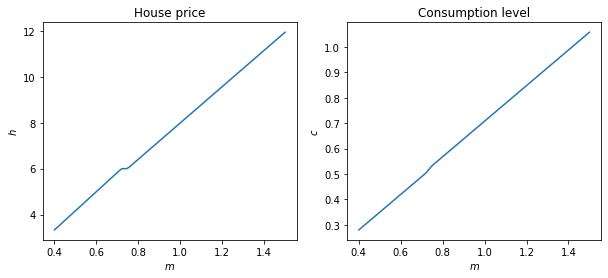

In [27]:
# Create an array for m and a container for the values of h* and c*.
N=100
m2=np.linspace(0.4,1.5,num=N)
h_star_values=np.empty(N)
c_star_values=np.empty(N)

#Create a loop that optimises over the m array.
for i,m in enumerate (m2):
    hc = inauguralproject.u_optimiser(m, r, pbar, taug, taup, epsilon, phi)

    h_star_values[i] = hc
    c_star_values[i] = m-(r*hc+taug*hc*epsilon+taup*max(hc*epsilon-pbar,0)) #Function for consumption

#Plot the figure.
inauguralproject.two_figures(m2,h_star_values,"House price", "$m$", "$h$", m2, c_star_values,"Consumption level", "$m$", "$c$")

# Question 3

Here we use the total tax function to find the total tax revenue and the average tax burden per household. 
This is done by setting up a random numpy with a lognormal (-0.4, 0.35) distribution. Then we loop over it 10,000 times yielding the total tax revenue, divided by the amount of households 10,000 to find the average tax burden.

In [28]:
# Calculating the average and total tax revenue.

#Set up the parameters:
phi=0.3
epsilon=0.5
r=0.03
taug=0.012
taup=0.004
pbar=3.0
seed=1
size=10000
mean=-0.4
sigma=0.35

#Set seed and draw a random m value from the lognormal distribution.
np.random.seed(seed)
m_i = np.random.lognormal(mean=mean,sigma=sigma,size=size)

#set empty list
tax = []

#For loop that calculates the optimal house price for each value of m and then runs it through the taxburden function.
for m in m_i:        
    h_best = inauguralproject.u_optimiser(m,r,pbar,taug,taup,epsilon,phi)
    tax.append(inauguralproject.tax_new(h_best,pbar,taug,taup,epsilon))

#Print the results
print('This correlatas to a total tax revenue of:  '+str(sum(tax)))
print('The average household tax burden is therefore: '+str(sum(tax)/size))
print('In non-millions this is: '+str(sum(tax)*100)+' DKK')





This correlatas to a total tax revenue of:  363.2680342536602
The average household tax burden is therefore: 0.03632680342536602
In non-millions this is: 36326.803425366015 DKK


# Question 4

We repeat the steps from Q3 but this time with new parameters.

$$\epsilon=0.8, \ \tau^{g}=0.01, \ \tau^{p}=0.009, \ \bar{p}=8$$

In [29]:
# Calculate the average and total tax revenue.

#Set up the parameters:
phi_4=0.3
epsilon_4=0.8
r_4=0.03
taug_4=0.01
taup_4=0.009
pbar_4=8.0

#Set seed and draw a random m value from the lognormal distribution.
np.random.seed(seed)
m_i = np.random.lognormal(mean=mean,sigma=sigma,size=size)

#set empty list
tax_4 = []

#For loop that calculates the optimal house price for each value of m and then runs it through the taxburden function.
for m in m_i:        
    h_best_4 = inauguralproject.u_optimiser(m,r_4,pbar_4,taug_4,taup_4,epsilon_4,phi_4)
    tax_4.append(inauguralproject.tax_new(h_best_4,pbar_4,taug_4,taup_4,epsilon_4))

#Print the results
print('This correlatas to a total tax revenue of:  '+str(sum(tax_4)))
print('The average household tax burden is therefore: '+str(sum(tax_4)/size))
print('In non-millions this is: '+str(sum(tax_4)*100)+' DKK')


This correlatas to a total tax revenue of:  450.3629313721809
The average household tax burden is therefore: 0.04503629313721809
In non-millions this is: 45036.29313721809 DKK


# Question 5

We now want to ensure that the average tax burden from Q4 remains the same as it was in Q3 by lowering the tax level $\tau^{g}$. We achieve this using a while loop where $\tau^{g}$ starts at zero and is then raised until the average tax burden is within 0.001 of what it was in Q3.

In [30]:
# Determine the value of taug that ensures that the average tax burden remians the same from Q3 to Q4

#Set up the parameters but with taug as 0:
new_phi=0.3
new_epsilon=0.8
new_r=0.03
new_taug=0
new_taup=0.009
new_pbar=8.0

#Create a taug that is optimized and set it to none
op_taug=None

# Set up a While-loop that optimises taug.
while op_taug is None:
    
    # Create an empty list
    new_tax = []   
    
    # Set up a for loop like before
    for m in m_i:
        h_best = inauguralproject.u_optimiser(m,new_r,new_pbar,new_taug,new_taup,new_epsilon,new_phi)
        new_tax.append(inauguralproject.tax_new(h_best,new_pbar,new_taug,new_taup,new_epsilon))           
    
    mean_new = sum(new_tax)/size
    mean_old = sum(tax)/size
    # Check if average taxburden is equal to taxburden in Q3
    if math.isclose(mean_new, mean_old, abs_tol=0.001):    
        op_taug = new_taug                                
       
    # If the average taxburden is not within 0.001 of the one in Q3 then add 0.00001 to taug
    else:
        new_taug = new_taug + 0.00001        

# Print the results:
print('The optimal value of tau_g is approximately: '+str(op_taug))
print('This correlatas to a total tax revenue of:  '+str(sum(new_tax)))
print('The average household tax burden is therefore: '+str(mean_new))
print('In non-millions this is: '+str(sum(new_tax)*100)+' DKK')



The optimal value of tau_g is approximately: 0.007419999999999866
This correlatas to a total tax revenue of:  353.37884496960294
The average household tax burden is therefore: 0.03533788449696029
In non-millions this is: 35337.884496960294 DKK



It takes a long time to execute, so here are the results in text form:

The optimal value of tau_g is approximately: 0.007419999999999866

This correlates to a total tax revenue of:  353.37884496960294

The average household tax burden is therefore: 0.03533788449696029

In non-millions this is: 35337.884496960294 DKK


# Conclusion

In Q3 we calculated the total tax revenue optained thorugh house taxation as well as the average household tax burden from this.

Then in Q4 the normal house tax $\tau^{g}$ was lowered whereas $\epsilon$, $\bar{p}$, and $\tau^{p}$ where raised, thus resulting in a higher tax burden mainly due to the higher $\epsilon$ which meant that house prices where higher.

The purpose of Q5 was then to lower the average tax to a level that meant that the average household tax burden was the same in Q4 as it was in Q3. In effect this means that houses are now valued higher, but the percentage tax on them is lower and for the higher tax bracket the tax is higher, however, qualifying for the higher tax bracket is now harder due to the fact that only houses of a value that exceeds 8 million DKK now qualifies as opposed to 3 million DKK before.




